In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://dc-edu.itmo.ru/assets/courseware/v1/6c89dd85d23926d43494d0e4dd968840/asset-v1:ITMO+DS+2024+type@asset+block/94_16.csv', header = None)
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,13.648938,-7.175716,-5.609337,-6.107276,-2.965088,-7.997695,-8.725442,-3.060533,0.912637,3.524539
std,5.410092,7.810819,17.654396,8.925655,4.599278,14.330792,6.859131,19.763887,19.750764,9.393779
min,6.914555,-17.334996,-26.707794,-20.397205,-12.939674,-26.324817,-21.548309,-27.390035,-26.237301,-7.650646
25%,10.021664,-13.027605,-22.980626,-12.779413,-5.742113,-18.292393,-15.139137,-21.486845,-16.531338,-2.343354
50%,11.333764,-9.721820,-6.977941,-6.146143,-1.451712,-11.222941,-9.507880,-5.578858,2.247679,-0.145523
75%,15.523334,-4.423073,11.708101,0.097262,0.257695,0.626118,-4.138139,13.180596,19.074481,7.649601
max,25.095918,7.374109,15.992131,9.412555,3.928127,16.158754,3.907143,25.980566,25.302010,22.819532


In [3]:
df.shape

(60, 10)

In [4]:
from sklearn.decomposition import PCA

тут мы вызвали обучили модель fit  и уже сделали новый датафрейм и поулчили новый фрейм
pca_data = pca.transform(df) который уже описан с помощью не 10 а 2 главн компонент

In [30]:
pca = PCA(n_components = 2, svd_solver = 'full') # по умолчанию берет 10 компонент, если не указать количество
pca.fit(df)   # скармливаем любую таблицу - обучаем метод pca
pca_data = pca.transform(df)

In [31]:
pca.explained_variance_ratio_

array([0.49224676, 0.28867288])

In [32]:
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
explained_variance_ratio

array([0.49224676, 0.78091964])

ValueError: x and y must have same first dimension, but have shapes (1,) and (2,)

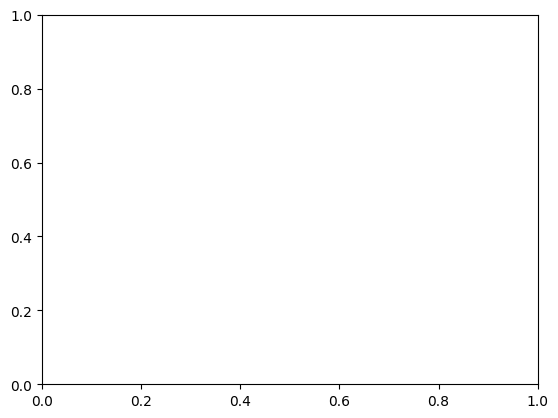

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.arange(1, 2), explained_variance_ratio, ls = '-') # результат подтверждает как выше что нам  хватит три ГК


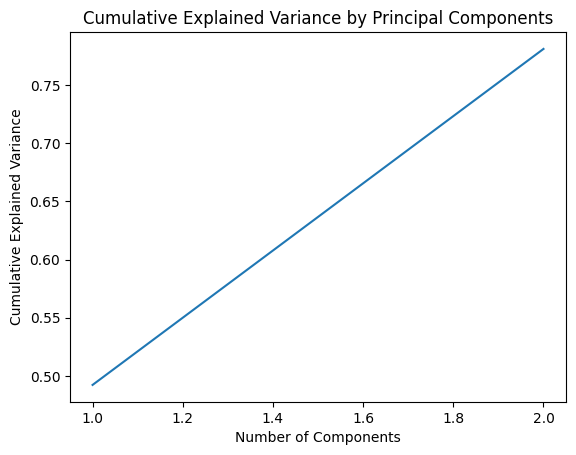

In [57]:
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, ls='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()


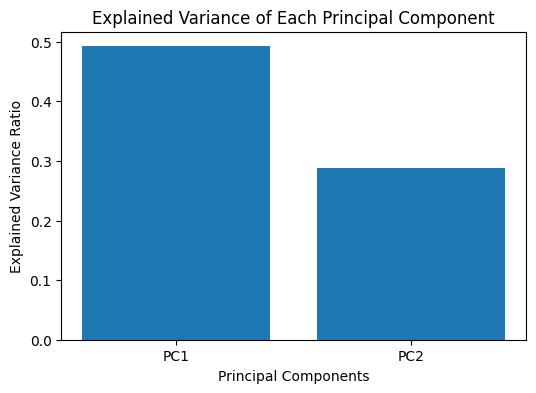

In [58]:
# Параметры графика
plt.figure(figsize=(6, 4))
plt.bar([1, 2], pca.explained_variance_ratio_, tick_label=['PC1', 'PC2'])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance of Each Principal Component')
plt.show()


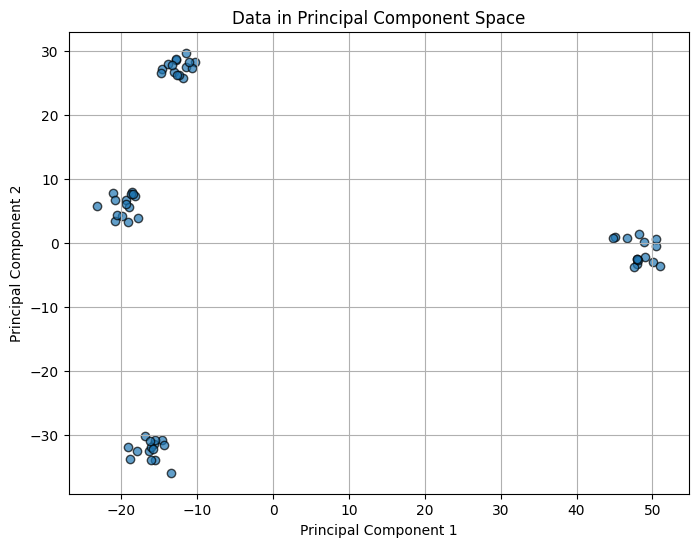

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.7, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data in Principal Component Space')
plt.grid(True)
plt.show()


Выведем полученные новые координаты объекта с индексом 0.

In [6]:
pca_data[0]     # в итоге мы вместо 10 объектов снизили до 2 наших компонент

array([-19.05792582, -31.91261445])

In [8]:
pca.components_.shape

(2, 10)

In [9]:
pca.components_

array([[ 0.18350193, -0.03302002,  0.43776131, -0.07859612, -0.14966591,
         0.46775475,  0.05267998,  0.52494143, -0.49533105, -0.0503834 ],
       [-0.0174599 ,  0.31725924,  0.47573442,  0.28194334, -0.0239379 ,
         0.0960839 ,  0.16039653,  0.13156141,  0.63942788, -0.36265389]])

По заданию нас просят вычислить долю объясненной дисперсии при использовании двух ГК. Для этого построим 10 ГК, тк изначально объекты обладали 10 признаками.

In [15]:
pca = PCA(n_components = 10, svd_solver = 'full')
pca_data = pca.fit_transform(df)

In [16]:
pca_data[0]

array([-19.05792582, -31.91261445, -14.19047482,  -1.40846852,
         0.65221233,   0.72921321,   2.70383991,   1.45816483,
         0.3763512 ,   0.35953474])

Доля объясненной дисперсии для каждой ГК хранится в поле explained_variance_ratio_, используем сумму с накоплением: np.cumsum.

In [17]:
import numpy as np

In [18]:
pca.explained_variance_  # получим массив чисел описывающих каждой из 10 гла компоннет сначала 1 и так далее

array([799.47894399, 468.8459252 , 341.34346024,   3.3539812 ,
         2.84731117,   2.35752266,   1.93235227,   1.78631014,
         1.37394802,   0.82287084])

находим доли предыдухи чисел

результат показывает что первые 3 имеют значительн долю, а вторые пять нет, то есть можно модель описать только первыми тремя числам, то е методом ГК можно использовать эти 3 ГК
0.49224676, 0.28867288, 0.2101684

То есть в ответ ена вопрос к заданию : Введите долю объясненной дисперсии при использовании первых двух главных компонент.
нам надо сложить первые два числа

In [26]:
pca.explained_variance_ratio_ # показывает долю дисперсии в процентах , то есть первая К показывает 48 % , вторая 28, и так далее
                               # и в итоге мы видим что Три ГК вносят ощутимы вклад , как и предсказывалось. То есть все данные можно опсать треся столбцами

array([0.49224676, 0.28867288, 0.2101684 , 0.00206508, 0.00175312,
       0.00145155, 0.00118977, 0.00109985, 0.00084595, 0.00050665])

чтоюы не считать вручну. сделаем такой метод который считает:
array([0.49224676 (перв элемен) 0.78091964 (сумма первых двух)  0.99108804 (ссумма первых трех ) и так далее 0.99315312, 0.99490623,
       0.99635778, 0.99754755, 0.9986474 , 0.99949335, 1 (сумма всех 10 равна 1 )         ])

In [25]:
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
explained_variance_ratio

array([0.49224676, 0.78091964, 0.99108804, 0.99315312, 0.99490623,
       0.99635778, 0.99754755, 0.9986474 , 0.99949335, 1.        ])

In [22]:
# Инициализация массива explained_variance_ratio = np.array([0.231, 0.345, 0.452])

# Округление чисел до тысячных
rounded_values = np.round(explained_variance_ratio, decimals=3)

# Печать результата
print(rounded_values)

[0.492 0.781 0.991 0.993 0.995 0.996 0.998 0.999 0.999 1.   ]


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

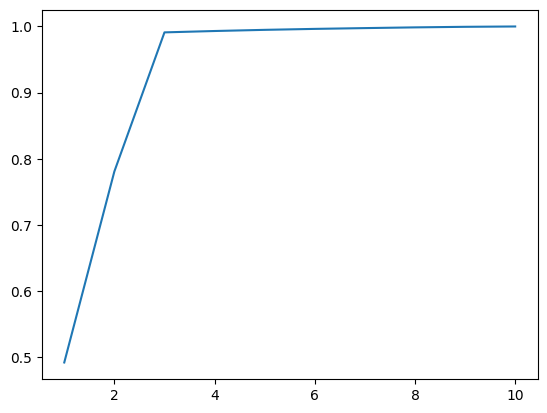

In [24]:
plt.plot(np.arange(1,11), explained_variance_ratio, ls = '-') # результат подтверждает как выше что нам  хватит три ГК

Далее
Какое минимальное количество главных компонент необходимо использовать, чтобы доля объясненной дисперсии превышала 0.85
Определим количество ГК, необходимых для превышения заданного порога доли объясненной дисперсии:

In [54]:
treshold = 0.85
dim = 0
for value in explained_variance_ratio:
  if value > treshold:
    print('Минимальное количество ГК для заданного порога: ', dim + 1)
    break
  dim += 1

Далее задание
Какое количество групп объектов можно выделить, если использовать только первые две главных компоненты?

Вернемся к случаю только первых двух ГК и построим соответствующий график.
т к 2 ГК то одну мы деаем по оси х втору по оси y
по оси х берет первый весь преобразованный столбец 60 точек  pca_data[:, 0]
по оси y ,берет второй столбец 60 точек (в файле 60 строк) pca_data[:, 1]
 1 столюец 1ГК,
 2 столюец это 2 ГК

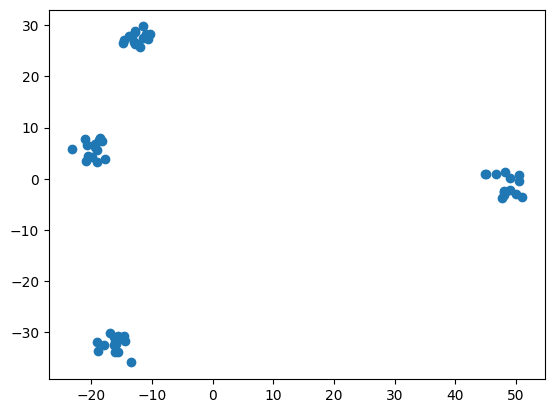

In [55]:
plt.scatter(pca_data[:, 0], pca_data[:, 1])

Разделение получиллось на 4 объекта - вводим в ответ 4 , но по нему видно что 4 не влияет ни на что, что говорит о резултататх выше что у насхватает 3 ГК